# Reproducibility 

Within samples and across samples.

In [46]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../../src')
from util import *
from config import *
from study_gen import study
import generate_dataset
import plots
import ipynbname

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Barcode replicates
- histogram
- x-axis = Pearson R (binned)
- y-axis = # barcode pairs


In [ ]:
%autoreload 2

for sample in study.get_samples():
    plots.barcode_replicates(study, sample)
    savefig2(ipynbname.path(), '[A] Barcodes replicates/{}'.format(sample))
    if not generate_plots:
        break

### Sample replicates scatter (per construct)
- scatter plot
- x-axis = construct1 
- y-axes = construct2
- fit: 
    - x=y (line of identity)
    - best-fit line
    - Pearson R


/Users/ymdt/src/dreem/dreem/draw/manipulator.py:77: FutureWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`

/Users/ymdt/src/dreem/dreem/draw/manipulator.py:77: FutureWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`

/Users/ymdt/src/dreem/dreem/draw/manipulator.py:77: FutureWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`

/Users/ymdt/src/dreem/dreem/draw/manipul

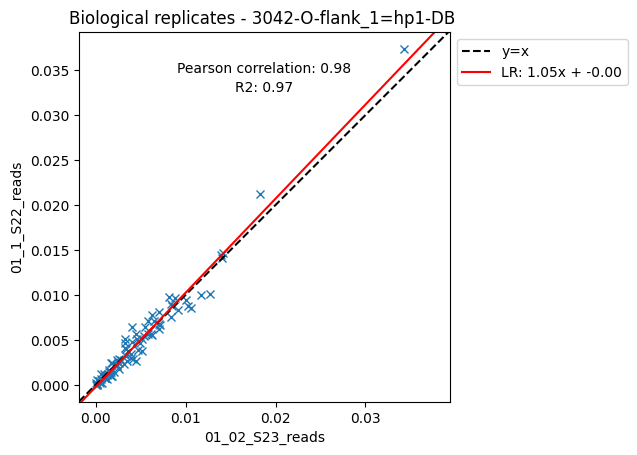

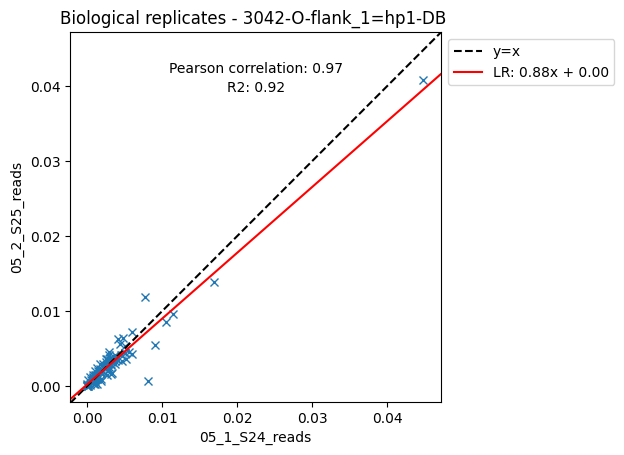

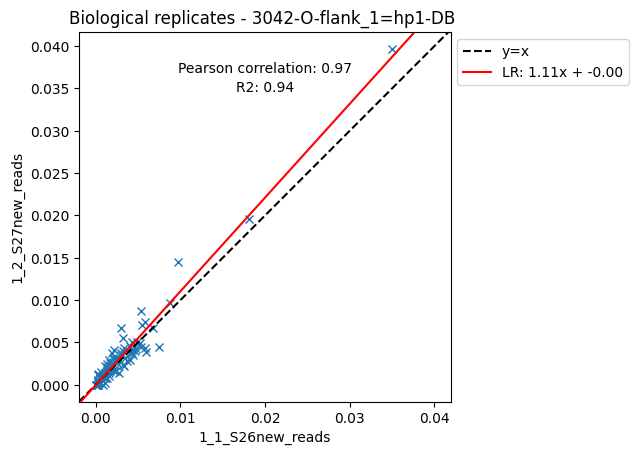

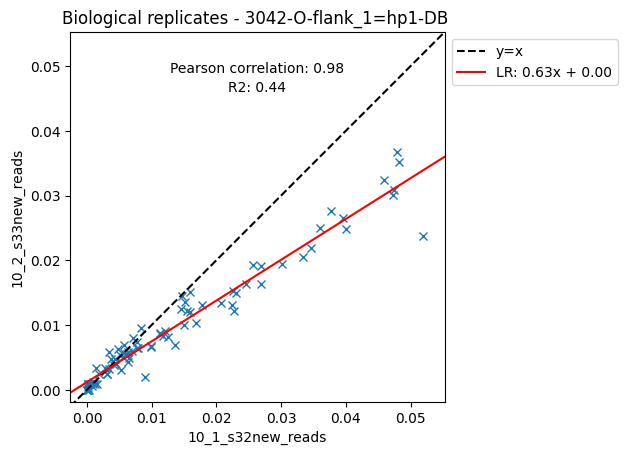

In [11]:
for samples in bio_replicates_samples:
    for construct in study.df[study.df['sample'].isin(samples)]['construct'].unique():
        plots.barcode_replicates_per_construct(study, samples, construct)
        savefig2(ipynbname.path(), '[B] Sample replicates scatter (per construct)/{}-{}/{}'.format(samples[0], samples[1], construct))
        if not generate_plots:
            break

### Sample replicates heat map (per family)
- heat-map
- pearson R everything vs. everything
- MS2, LAH and ROI seperately
- across all samples 
- inside a family

In [44]:
for samples in bio_replicates_samples:
    for family in study.df[study.df['sample'].isin(samples)]['family'].unique():
        for section in ['MS2','ROI','LAH']:
            plots.barcode_replicates_per_family(study, samples, family, section=section)
            savefig2(ipynbname.path(), '[C] Sample replicates heat map (per family)/{}-{}/{}/{}'.format(samples[0], samples[1], family, section))
            if not generate_plots:
                break

/Users/ymdt/src/dreem/dreem/draw/manipulator.py:77: FutureWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`

